# Try-this Exercises

## Problem 1: 

Design an experiment to investigate the use of the F statistic to discern differences in variances.

### $\textit{Answer}: $
We start by constructing two sample disributions. We'll take them to be Gaussians with the same mean but standard deviations:

In [19]:
# Import necseccary packages
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats

# Set plot stuff
fontsize = 20
figsize = (10,6)

# Configure parameters
plt.rcParams.update({'font.size': fontsize, 'figure.figsize': figsize})

# Default tick label size
plt.rcParams['xtick.labelsize'] = fontsize
plt.rcParams['ytick.labelsize'] = fontsize
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.major.size'] = 8
plt.rcParams['ytick.major.size'] = 8
plt.rcParams['xtick.major.width'] = 2
plt.rcParams['ytick.major.width'] = 2

plt.rcParams['xtick.top'] = True
plt.rcParams['ytick.right'] = True
plt.rcParams['axes.linewidth'] = 2

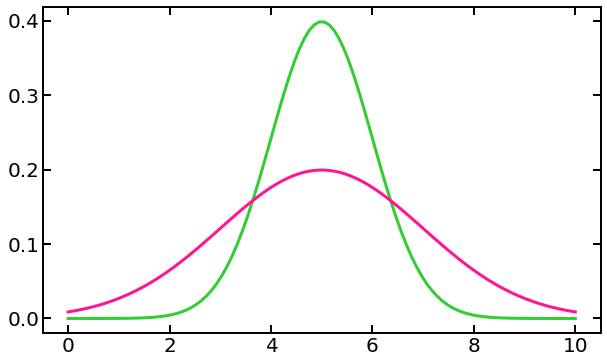

In [87]:
mu = 5
sigma1 = 1
sigma2 = 2
x = np.linspace(0,10, 100)

norm_dist1=scipy.stats.norm(loc=mu,scale=sigma1)
norm_dist2=scipy.stats.norm(loc=mu,scale=sigma2)
func1= norm_dist1.pdf(x)
func2 = norm_dist2.pdf(x)


plt.plot(x,func1, linewidth = 3, color='limegreen')
plt.plot(x,func2, linewidth = 3, color='deeppink')


From lecture, the f statistic is just the ratio of the variences of the two samples. For a Gaussian distribution, the variance is just the square of the standard deviation:

In [88]:
def f(d1,d2):
    return np.var(func1) / np.var(func2)

f(func2,func1)

4.135714055711367

Now compare this to the f-test:


/home/idies/miniconda3/envs/py37/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:1680: RuntimeWarning: divide by zero encountered in log
  lPx = m/2 * np.log(m) + n/2 * np.log(n) + (n/2 - 1) * np.log(x)


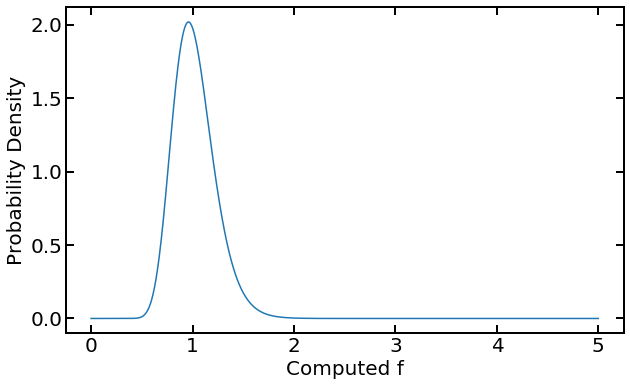

In [84]:
f1=scipy.stats.f(len(func1)-1,len(func2)-1)

plt.xlabel('Computed f')
plt.ylabel('Probability Density')
x2 = np.linspace(0,5,1000)
plt.plot(x2,f1.pdf(x2))

In [99]:
# Loop through for different values of sigma

for i in range(1,25):
    mu = 5
    sigma1 = i
    sigma2 = 2
    x = np.linspace(0,10, 100)

    norm_dist1=scipy.stats.norm(loc=mu,scale=sigma1)
    norm_dist2=scipy.stats.norm(loc=mu,scale=sigma2)
    func1= norm_dist1.pdf(x)
    func2 = norm_dist2.pdf(x)
    
    f_calc = np.var(func1) / np.var(func2)
    print(f_calc)
    
    
    
    

4.135714055711367
1.0
0.24470729282949857
0.06761348851641442
0.022089874067572214
0.008376299456180234
0.0035858787795356437
0.0016923529403718995
0.0008643381922218721
0.00047098851242675113
0.0002708525289052248
0.00016299188756404735
0.00010195363083008778
6.593531915203742e-05
4.3896328511419464e-05
2.997695531037423e-05
2.0936990297385423e-05
1.4918817397069542e-05
1.0822803976023115e-05
7.979139014481181e-06
5.969221731141234e-06
4.5253177348710995e-06
3.472551907208725e-06
2.694495852406143e-06


## Problem 2:  
Find the two data sets flux_densities_galaxies.dat and flux_densities_random.dat in the lecture8 module page.  The first data set gives the flux densities (in some odd units) measured in a region where there is an over-density of galaxies, and the second gives the flux densities in random regions of the sky.  The claim is that there is an excess of flux density in the regions where there are galaxies.  

- Make a cumulative distribution plot for the two distributions.  Do you see much of a difference?
- Use the Wilcoxon-Mann-Whitney U test, the KS test, and the Anderson-Darling test to investigate the claim that there is an excess of flux at the location of the galaxies.

Discuss. What do you conclude?

### $\textit{Answer:}$
We'll start by reading in the two text files and then constructing CDFs for each:

In [13]:
# Read in text-file
flux_den_overden= np.loadtxt('flux_densities_galaxies.dat')
flux_den_field = np.loadtxt('flux_densities_random.dat')

In [14]:
# Find idea bin size. We'll use the same bins for each
bins = np.histogram(flux_den_overden)[1]
bins

array([-12.841 , -10.2176,  -7.5942,  -4.9708,  -2.3474,   0.276 ,
         2.8994,   5.5228,   8.1462,  10.7696,  13.393 ])

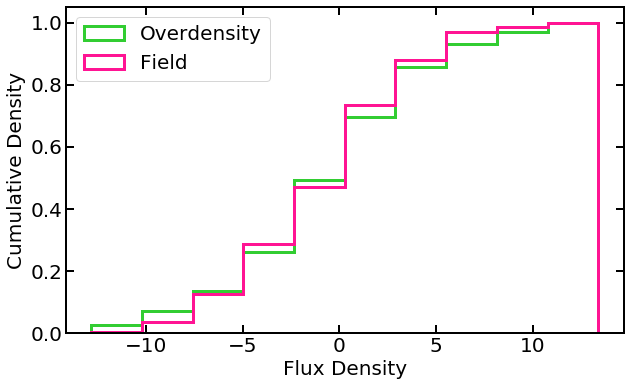

In [15]:
# Construct cumulative distribution for each using this binning scheme
plt.hist(flux_den_overden,histtype='step',bins=bins,align='mid',linewidth=3,cumulative=True,density=True, color='limegreen',label='Overdensity')
plt.hist(flux_den_rand,histtype='step',bins=bins,align='mid',linewidth=3,cumulative=True,density=True, color='deeppink',label='Field')
plt.xlabel('Flux Density')
plt.ylabel('Cumulative Density')
plt.legend(loc = 'upper left')

So it looks like there isn't much of a difference in cumulative probability density between the two samples. Next, we'll apply various tests to see if there is an excess of flux in the sample in the overdensity compared to the field. First up is the is the Wilcoxon-Mann-Whitney U test. In this case we adopt a null hypothesis $H_0$ that both samples have identical flux densities. We take $H_1$ to be the hypothesis that the overdensity sample has an excess of flux, i.e., that A is stochastically larger than B. 

We can use `scipy.stats.mannwhitneyu`, `scipy.stats.ks_2samp` and `scipy.stats.anderson_ksamp` to find the p value:

In [26]:
# Apply tests:
scipy.stats.mannwhitneyu(flux_den_overden,flux_den_field) # Mann-Whitney
scipy.stats.ks_2samp(flux_den_overden,flux_den_field) # KS 
scipy.stats.anderson_ksamp([flux_den_overden,flux_den_field]) # Anderson-Darling

print('Wilcoxon-Mann-Whitney U Test: p = ' + str(scipy.stats.mannwhitneyu(flux_den_overden,flux_den_field)[1]))
print('KS test: p = ' + str(scipy.stats.ks_2samp(flux_den_overden,flux_den_field)[1]))
print('Anderson-Darling Test: p = ' + str(scipy.stats.anderson_ksamp([flux_den_overden,flux_den_field])[2]))



Wilcoxon-Mann-Whitney U Test: p = 0.36654288292310444
KS test: p = 0.4159511900220736
Anderson-Darling Test: p = 0.25


/home/idies/miniconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: p-value capped: true value larger than 0.25
  after removing the cwd from sys.path.
/home/idies/miniconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: p-value capped: true value larger than 0.25
  


We see that all three tests yield very large p values meaning that $\textbf{we are unable to reject the null hypothesis.}$ Therefore we assert that both the field and overdensity samples have statistically similar flux density distributions.